In [1]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

In [2]:
# 指定cfg文件的位置，这个文件包含了模型的结构
cfg_file = './cfg/yolov3.cfg'

# 指定weights文件的位置，这个文件包含了模型的权重
weight_file = './weights/yolov3.weights'

# 指定COCO数据集类标签
namesfile = 'data/coco.names'

# 载入模型结构
m = Darknet(cfg_file)

# 载入模型权重
m.load_weights(weight_file)

# 载入COCO类标签
class_names = load_class_names(namesfile)

In [3]:
nms_thresh = 0.6  

In [4]:
iou_thresh = 0.4



It took 4.082 seconds to detect the objects in the image.

Number of Objects Detected: 130 

Objects Found and Confidence Level:

1. person: 1.000000
2. person: 1.000000
3. person: 1.000000
4. person: 1.000000
5. person: 0.999806
6. person: 0.999978
7. person: 1.000000
8. person: 1.000000
9. person: 1.000000
10. person: 1.000000
11. person: 0.999999
12. person: 1.000000
13. person: 1.000000
14. person: 1.000000
15. person: 1.000000
16. person: 1.000000
17. person: 1.000000
18. person: 1.000000
19. person: 1.000000
20. person: 1.000000
21. person: 1.000000
22. person: 0.999992
23. person: 1.000000
24. person: 1.000000
25. person: 0.999999
26. person: 1.000000
27. person: 1.000000
28. person: 0.999999
29. person: 1.000000
30. person: 1.000000
31. person: 0.999999
32. person: 1.000000
33. person: 1.000000
34. person: 1.000000
35. person: 1.000000
36. person: 0.999271
37. person: 1.000000
38. person: 0.999988
39. person: 0.999996
40. person: 1.000000
41. person: 0.999999
42. person: 0.99

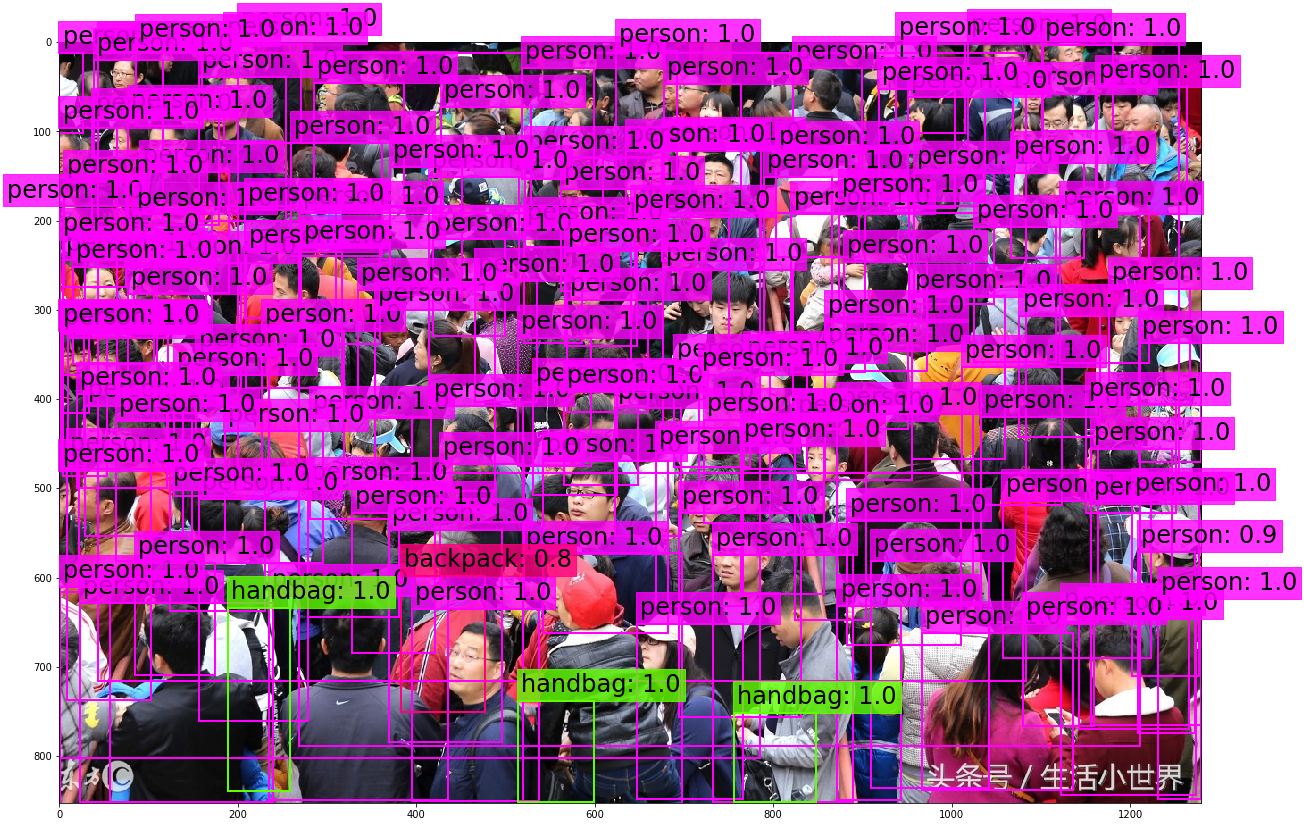

In [12]:
# 设置图像大小
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# 载入图像
img = cv2.imread('./images/people.jpeg')

# 转为RGB颜色通道
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 缩放图像为模型输入维度
resized_image = cv2.resize(original_image, (m.width, m.height))

# 设置IOU阈值
iou_thresh = 0.5

# 设置NMS阈值
nms_thresh = 0.1

# 检测图像中的物体
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# 输出检测到的物体及置信度
print_objects(boxes, class_names)

# 可视化图像、框，及分类结果
plot_boxes(original_image, boxes, class_names, plot_labels = True)